In [2]:
import pandas as pd
import numpy as np
import requests as req
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
# API status check
r = req.get('https://api.llama.fi/protocols')
print(r.status_code)

r1 = req.get('https://yields.llama.fi/pools')
print(r1.status_code)

r2 = req.get('https://yields.llama.fi/chart/747c1d2a-c668-4682-b9f9-296708a3dd90')
print(r2.status_code)

200
200
200


## Current Pool Data

In [3]:
# Raw pool data in dictionaries 

pool_dict_raw = dict(pd.DataFrame(req.get('https://yields.llama.fi/pools').json())['data'])

# Dataframe of raw data
df_raw = pd.DataFrame.from_dict(pool_dict_raw, orient='index')
df_raw = df_raw.sort_values(by ='tvlUsd', ascending = False)
eth_pools = df_raw[df_raw.chain == 'Ethereum']

In [4]:
#eth_pools[eth_pools.project.str.contains('uniswap-v3')].head(50)

eth_pools[(eth_pools.project =='aave-v2') & (eth_pools.symbol.str.contains('BUSD'))]

,chain,project,symbol,tvlUsd,apyBase,apyReward,apy,rewardTokens,pool,apyPct1D,...,mu,sigma,count,outlier,underlyingTokens,il7d,apyBase7d,apyMean30d,volumeUsd1d,volumeUsd7d
682,Ethereum,aave-v2,BUSD,4909781,2.24192,NaN,2.24192,None,fd700196-ace0-4adc-8c91-6da04acb4ec3,0.42924,...,0.77798,0.02548,177,False,[0x4fabb145d64652a948d72533023f6e7a623c7c53],NaN,NaN,1.1749,NaN,NaN


In [1197]:
eth_pools[eth_pools.pool.isin(c)][['project','symbol','pool', 'tvlUsd','apy']]

['cefa9bb8-c230-459a-a855-3b94e96acd8c','e737d721-f45c-40f0-9793-9f56261862b9','a349fea4-d780-4e16-973e-70ca9b606db2',
'60d657c9-5f63-4771-a85b-2cf8d507ec00','57647093-2868-4e65-97ab-9cae8ec74e7d','7da72d09-56ca-4ec5-a45f-59114353e487',
'e2c09021-0aa8-42b6-a596-5422c2e35399','4bb8783d-9919-4a8e-980e-546401a67f63', 'fd700196-ace0-4adc-8c91-6da04acb4ec3']

,project,symbol,pool,tvlUsd,apy
17,curve,FRAX-USDC,3f6aa14f-eb0c-4738-bf74-8bc666f7d2b1,487133049,1.32
22,convex-finance,FRAX-USDC,bd072651-d99c-4154-aeae-51f12109c054,417212439,2.79
29,compound,USDC,cefa9bb8-c230-459a-a855-3b94e96acd8c,317599736,1.96
30,compound,DAI,cc110152-36c2-4e10-9c12-c5b4eb662143,275204394,1.98
67,convex-finance,MIM-3CRV,8a20c472-142c-4442-b724-40f2183c073e,122208614,10.13
85,compound,USDT,57647093-2868-4e65-97ab-9cae8ec74e7d,86389753,2.19
99,aave-v2,USDT,60d657c9-5f63-4771-a85b-2cf8d507ec00,71022336,2.75
104,compound-v3,USDC,7da72d09-56ca-4ec5-a45f-59114353e487,66264759,1.88
141,uniswap-v3,USDC-USDT,e737d721-f45c-40f0-9793-9f56261862b9,47750427,10.55


## Historical Pool Data

In [5]:
# Set Parameters for Basket

min_apy = 0
is_stablecoin = True
min_tvl = 80000000
top_x = 15
sort_by = 'apy' # or tvlUsd or apy


In [41]:
# or Create custom basket manually 
# eth_pools[(eth_pools.apyBase > min_apy) & 
#                          (eth_pools.stablecoin == is_stablecoin) & 
#           (eth_pools.tvlUsd > min_tvl)].sort_values(sort_by, ascending=False).head(top_x)[['project','symbol','pool', 'tvlUsd','apy']]


# custom list 

# olympus pool
l = ['bd072651-d99c-4154-aeae-51f12109c054', 'cc110152-36c2-4e10-9c12-c5b4eb662143',
     'e737d721-f45c-40f0-9793-9f56261862b9', '60d657c9-5f63-4771-a85b-2cf8d507ec00',
    'cefa9bb8-c230-459a-a855-3b94e96acd8c', 'f11aa021-e4c1-49f9-8004-9cf5625dedae']


# OHM pools     'ad68c6ce-699a-4c00-986f-5f92e38c1ac1', '645dffc4-fe90-4c8b-9c17-fd8f2143a5fe']

#compound RToken
c = ['3f6aa14f-eb0c-4738-bf74-8bc666f7d2b1', 'bd072651-d99c-4154-aeae-51f12109c054',
     '8a20c472-142c-4442-b724-40f2183c073e', 'cefa9bb8-c230-459a-a855-3b94e96acd8c',
     'cc110152-36c2-4e10-9c12-c5b4eb662143','e737d721-f45c-40f0-9793-9f56261862b9',
     '57647093-2868-4e65-97ab-9cae8ec74e7d', '7da72d09-56ca-4ec5-a45f-59114353e487',
     '60d657c9-5f63-4771-a85b-2cf8d507ec00']

# eUSD Pool 1
e1 = ['cefa9bb8-c230-459a-a855-3b94e96acd8c','e737d721-f45c-40f0-9793-9f56261862b9','a349fea4-d780-4e16-973e-70ca9b606db2',
'60d657c9-5f63-4771-a85b-2cf8d507ec00','57647093-2868-4e65-97ab-9cae8ec74e7d','7da72d09-56ca-4ec5-a45f-59114353e487',
'e2c09021-0aa8-42b6-a596-5422c2e35399','4bb8783d-9919-4a8e-980e-546401a67f63', 'fd700196-ace0-4adc-8c91-6da04acb4ec3']

# eUSD Pool 2
e2 = ['7da72d09-56ca-4ec5-a45f-59114353e487','60d657c9-5f63-4771-a85b-2cf8d507ec00','fd700196-ace0-4adc-8c91-6da04acb4ec3']

pool_symbols = eth_pools[eth_pools.pool.isin(e2)][['project','symbol','pool', 'tvlUsd','apy']]


In [42]:
# eth_pools[(eth_pools.apyBase > min_apy) & 
#                          (eth_pools.stablecoin == is_stablecoin) & 
#           (eth_pools.tvlUsd > min_tvl)].sort_values(sort_by, ascending=False).head(top_x)[['project','symbol','pool', 'tvlUsd','apy']]


In [43]:
# Creates a table with pool symbol and pool ids to be later used for joining 

# pool_symbols = eth_pools[(eth_pools.apyBase > min_apy) & 
#                          (eth_pools.stablecoin == is_stablecoin) & 
#           (eth_pools.tvlUsd > min_tvl)].sort_values(sort_by, ascending=False).head(top_x)[['project','symbol','pool', 'tvlUsd','apy']]

# calc for income
pool_symbols['income'] = pool_symbols.tvlUsd * pool_symbols.apy

# calc for income weighted basket based on current TVL and APY 
pool_symbols['income_basket_weight'] = round(pool_symbols.income / sum(pool_symbols.income),2)

# concat the pool symbol to show pool and protocol
pool_symbols['pool (protocol)'] = pool_symbols.symbol + " (" + pool_symbols.project + ")"

#drop columns that we no longer need
pool_symbols= pool_symbols.drop(['tvlUsd','apy','income'], axis=1)




In [44]:
pool_symbols


,project,symbol,pool,income_basket_weight,pool (protocol)
102,compound-v3,USDC,7da72d09-56ca-4ec5-a45f-59114353e487,0.40,USDC (compound-v3)
111,aave-v2,USDT,60d657c9-5f63-4771-a85b-2cf8d507ec00,0.57,USDT (aave-v2)
682,aave-v2,BUSD,fd700196-ace0-4adc-8c91-6da04acb4ec3,0.04,BUSD (aave-v2)


In [45]:
# Insert custom basket weights
custom_weights1 = [.12,.14,.11,.11,.11,.13,.10,.09,.09]

custom_weights2 = .33
pool_symbols.income_basket_weight = custom_weights2

In [46]:
basket_pool_ids = list(pool_symbols.pool)

In [47]:
pool_symbols

,project,symbol,pool,income_basket_weight,pool (protocol)
102,compound-v3,USDC,7da72d09-56ca-4ec5-a45f-59114353e487,0.33,USDC (compound-v3)
111,aave-v2,USDT,60d657c9-5f63-4771-a85b-2cf8d507ec00,0.33,USDT (aave-v2)
682,aave-v2,BUSD,fd700196-ace0-4adc-8c91-6da04acb4ec3,0.33,BUSD (aave-v2)


In [48]:
# Establishes a list of dataframes of historical data for each of the pools in the desired basket

pool_dfs = []
for i in basket_pool_ids:
    data = pd.DataFrame()
    data = pd.DataFrame(req.get('https://yields.llama.fi/chart/'+ str(i)).json()['data'])
    data = data[['timestamp','tvlUsd','apy']]
    data['timestamp'] = [i[0:10] for i in list(data.timestamp)]
    data['timestamp'] = pd.to_datetime(data.timestamp)
    data['pool_id'] = str(i)
    
    # joins pool symbol onto dataframe using pool id
    data = pd.merge(data, pool_symbols, how='left', 
         left_on= 'pool_id', right_on='pool' )[['timestamp','tvlUsd','apy','income_basket_weight','pool (protocol)']]
    
    # adds column for portfolio yield contribution (apy * income_basket_weight)
    data['portfolio_yield_contribution'] = data.iloc[:,2] * data.iloc[:,3]
    
    # renames columns to reflect pool symbol and drops pool symbol column
    pool_protocol_string = data['pool (protocol)'][0]
    data.columns = ['timestamp',  
                      ('tvlUsd | ' + pool_protocol_string), 
                       ('apy | ' + pool_protocol_string),
                    'income_basket_weight | ' + pool_protocol_string,
                    'pool (protocol)',
                   'portfolio_yield_contribution | ' + pool_protocol_string]
    data = data.drop('pool (protocol)', axis=1)
    
    # creates and calculates column for income (apy column has more decimal points than shown, results in slight math discrepency on income)
    #income_column_string = 'income | ' + pool_protocol_string
    #data[income_column_string] = data.iloc[:, 1] * data.iloc[:, 2] / 100
    
    pool_dfs.append(data)

In [49]:
#pool_dfs[0].income_basket_weight* pool_dfs[0].iloc[:, 2]
pool_dfs[0]
# for i in pool_dfs:
#     print(list(i)[1][8:], ' : ', len(i))



,timestamp,tvlUsd | USDC (compound-v3),apy | USDC (compound-v3),income_basket_weight | USDC (compound-v3),portfolio_yield_contribution | USDC (compound-v3)
0,2022-10-06,26011290,1.95765,0.33,0.646025
1,2022-10-07,26382036,1.94154,0.33,0.640708
2,2022-10-08,25918338,1.95550,0.33,0.645315
3,2022-10-09,27351099,1.90384,0.33,0.628267
4,2022-10-10,19331729,2.15375,0.33,0.710738
...,...,...,...,...,...
101,2023-01-15,63758256,1.92148,0.33,0.634088
102,2023-01-16,66513316,1.87965,0.33,0.620285
103,2023-01-17,66428135,1.87741,0.33,0.619545
104,2023-01-18,65787733,1.88948,0.33,0.623528


In [50]:
#Checks to see which pool within the basket has the least amount of historical data

for i in pool_dfs:
    print(list(i)[1][8:], ' : ', len(i))


 USDC (compound-v3)  :  106
 USDT (aave-v2)  :  343
 BUSD (aave-v2)  :  343


In [51]:
# Creating master dataframe with historical data froma all pools, using the pool that has the least hisory as base

from functools import reduce
df = reduce(lambda x, y: pd.merge(x, y, on = 'timestamp', how ='left'), sorted(pool_dfs, key=len))

In [52]:
df.dtypes

timestamp                                            datetime64[ns]
tvlUsd | USDC (compound-v3)                                   int64
apy | USDC (compound-v3)                                    float64
income_basket_weight | USDC (compound-v3)                   float64
portfolio_yield_contribution | USDC (compound-v3)           float64
tvlUsd | USDT (aave-v2)                                       int64
apy | USDT (aave-v2)                                        float64
income_basket_weight | USDT (aave-v2)                       float64
portfolio_yield_contribution | USDT (aave-v2)               float64
tvlUsd | BUSD (aave-v2)                                       int64
apy | BUSD (aave-v2)                                        float64
income_basket_weight | BUSD (aave-v2)                       float64
portfolio_yield_contribution | BUSD (aave-v2)               float64
dtype: object

In [53]:
df

,timestamp,tvlUsd | USDC (compound-v3),apy | USDC (compound-v3),income_basket_weight | USDC (compound-v3),portfolio_yield_contribution | USDC (compound-v3),tvlUsd | USDT (aave-v2),apy | USDT (aave-v2),income_basket_weight | USDT (aave-v2),portfolio_yield_contribution | USDT (aave-v2),tvlUsd | BUSD (aave-v2),apy | BUSD (aave-v2),income_basket_weight | BUSD (aave-v2),portfolio_yield_contribution | BUSD (aave-v2)
0,2022-10-06,26011290,1.95765,0.33,0.646025,204398714,1.24836,0.33,0.411959,18165840,0.41762,0.33,0.137815
1,2022-10-07,26382036,1.94154,0.33,0.640708,204818689,1.26153,0.33,0.416305,17539609,0.45761,0.33,0.151011
2,2022-10-08,25918338,1.95550,0.33,0.645315,199749954,1.30919,0.33,0.432033,17482637,0.45814,0.33,0.151186
3,2022-10-09,27351099,1.90384,0.33,0.628267,208517733,1.21763,0.33,0.401818,17364191,0.46209,0.33,0.152490
4,2022-10-10,19331729,2.15375,0.33,0.710738,212279579,1.18648,0.33,0.391538,17339409,0.47150,0.33,0.155595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2023-01-15,63758256,1.92148,0.33,0.634088,93927270,2.39152,0.33,0.789202,5130135,2.20939,0.33,0.729099
102,2023-01-16,66513316,1.87965,0.33,0.620285,83601782,2.52479,0.33,0.833181,5777477,2.03363,0.33,0.671098
103,2023-01-17,66428135,1.87741,0.33,0.619545,72491472,2.71391,0.33,0.895590,5894344,1.99039,0.33,0.656829
104,2023-01-18,65787733,1.88948,0.33,0.623528,61074829,2.92650,0.33,0.965745,4928703,2.24601,0.33,0.741183


In [54]:
tvl_cols = [col for col in df.columns if 'tvlUsd |' in col]
apy_cols = [col for col in df.columns if 'apy |' in col]
income_basket_cols = [col for col in df.columns if 'income_basket_weight |' in col]
yield_contribution_cols = [col for col in df.columns if 'portfolio_yield_contribution |' in col]

# total_income column is all the annualized incomes added together on a specific date
df['total_portfolio_yield'] = df[yield_contribution_cols].sum(axis=1)

In [55]:
df

,timestamp,tvlUsd | USDC (compound-v3),apy | USDC (compound-v3),income_basket_weight | USDC (compound-v3),portfolio_yield_contribution | USDC (compound-v3),tvlUsd | USDT (aave-v2),apy | USDT (aave-v2),income_basket_weight | USDT (aave-v2),portfolio_yield_contribution | USDT (aave-v2),tvlUsd | BUSD (aave-v2),apy | BUSD (aave-v2),income_basket_weight | BUSD (aave-v2),portfolio_yield_contribution | BUSD (aave-v2),total_portfolio_yield
0,2022-10-06,26011290,1.95765,0.33,0.646025,204398714,1.24836,0.33,0.411959,18165840,0.41762,0.33,0.137815,1.195798
1,2022-10-07,26382036,1.94154,0.33,0.640708,204818689,1.26153,0.33,0.416305,17539609,0.45761,0.33,0.151011,1.208024
2,2022-10-08,25918338,1.95550,0.33,0.645315,199749954,1.30919,0.33,0.432033,17482637,0.45814,0.33,0.151186,1.228534
3,2022-10-09,27351099,1.90384,0.33,0.628267,208517733,1.21763,0.33,0.401818,17364191,0.46209,0.33,0.152490,1.182575
4,2022-10-10,19331729,2.15375,0.33,0.710738,212279579,1.18648,0.33,0.391538,17339409,0.47150,0.33,0.155595,1.257871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2023-01-15,63758256,1.92148,0.33,0.634088,93927270,2.39152,0.33,0.789202,5130135,2.20939,0.33,0.729099,2.152389
102,2023-01-16,66513316,1.87965,0.33,0.620285,83601782,2.52479,0.33,0.833181,5777477,2.03363,0.33,0.671098,2.124563
103,2023-01-17,66428135,1.87741,0.33,0.619545,72491472,2.71391,0.33,0.895590,5894344,1.99039,0.33,0.656829,2.171964
104,2023-01-18,65787733,1.88948,0.33,0.623528,61074829,2.92650,0.33,0.965745,4928703,2.24601,0.33,0.741183,2.330457


(array([19266., 19280., 19297., 19311., 19327., 19341., 19358., 19372.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

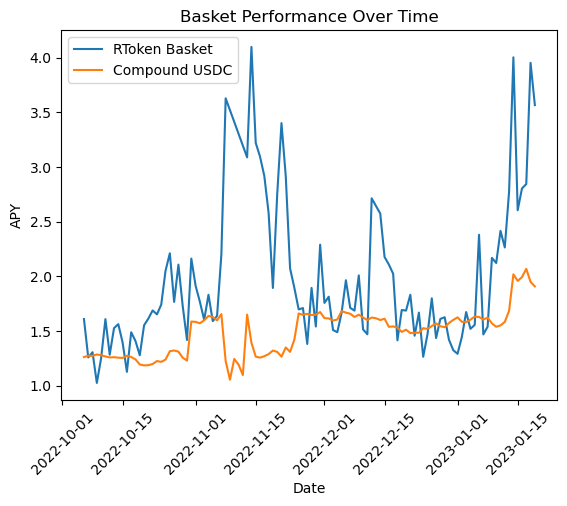

In [35]:
sns.lineplot(x = "timestamp", y = "total_portfolio_yield",
             data = df[df.total_portfolio_yield <4.5])
sns.lineplot(x = "timestamp", y = "apy | USDC (compound)",
              data = df)
plt.title('Basket Performance Over Time')
plt.ylabel('APY')
plt.xlabel('Date')
plt.legend(['RToken Basket','Compound USDC'])
plt.xticks(rotation = 45)


(array([19266., 19280., 19297., 19311., 19327., 19341., 19358., 19372.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

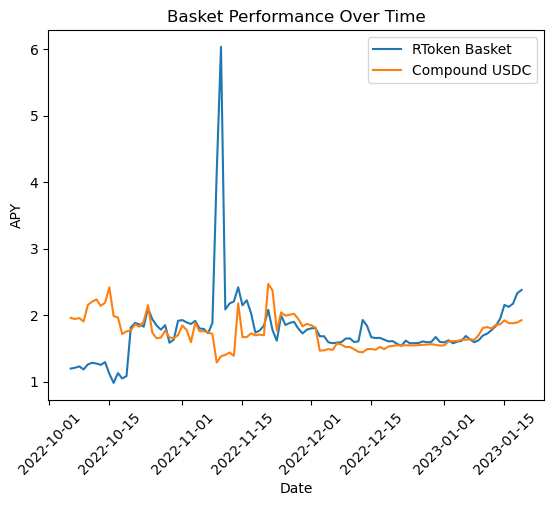

In [56]:
sns.lineplot(x = "timestamp", y = "total_portfolio_yield",
             data = df)
sns.lineplot(x = "timestamp", y = "apy | USDC (compound-v3)",
              data = df)
plt.title('Basket Performance Over Time')
plt.ylabel('APY')
plt.xlabel('Date')
plt.legend(['RToken Basket','Compound USDC'])
plt.xticks(rotation = 45)


In [57]:
sum((df.total_portfolio_yield/365) * 10000000)

5154329.761643834

In [58]:
sum((df['apy | USDC (compound-v3)']/365) * 10000000)

5051112.054794519

In [36]:
df['apy | USDC (compound-v3)']

0      1.95765
1      1.94154
2      1.95550
3      1.90384
4      2.15375
        ...   
101    1.92148
102    1.87965
103    1.87741
104    1.88948
105    1.87797
Name: apy | USDC (compound-v3), Length: 106, dtype: float64

([<matplotlib.axis.XTick at 0x7f9d73321040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

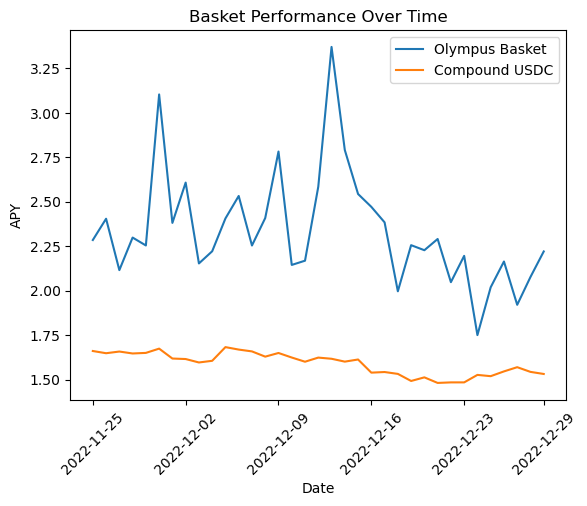

In [990]:


sns.lineplot(x = "timestamp", y = "total_portfolio_yield",
             data = df[df.total_portfolio_yield <4.5])
sns.lineplot(x = "timestamp", y = "apy | USDC (compound)",
              data = df)
plt.title('Basket Performance Over Time')
plt.ylabel('APY')
plt.xlabel('Date')
plt.legend(['Olympus Basket','Compound USDC'])
plt.xticks(rotation = 45)
plt.xticks(['2022-11-25','2022-12-02','2022-12-09','2022-12-16','2022-12-23', '2022-12-29'])

In [ ]:
df['apy | USDC (compound)'].rolling(7).mean()

In [1006]:
df['ohm_mov_avg'] = df['total_portfolio_yield'].rolling(7).mean()
df['compound_mov_avg'] = df['apy | USDC (compound)'].rolling(7).mean()

(array([19205., 19236., 19266., 19297., 19327., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

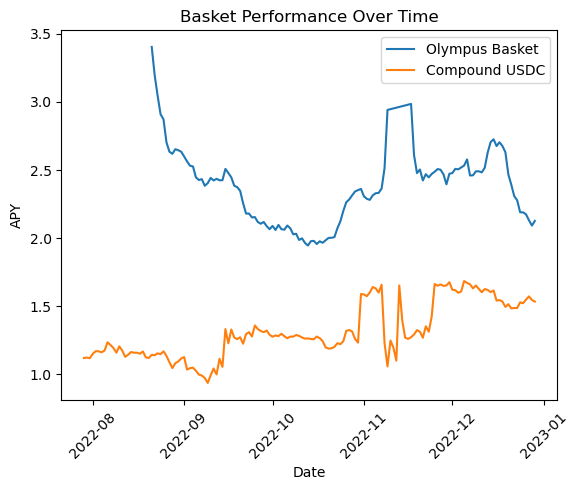

In [1010]:
sns.lineplot(x = "timestamp", y = "ohm_mov_avg",
             data = df[df.ohm_mov_avg <3.5])
sns.lineplot(x = "timestamp", y = "apy | USDC (compound)",
              data = df)
plt.title('Basket Performance Over Time')
plt.ylabel('APY')
plt.xlabel('Date')
plt.legend(['Olympus Basket','Compound USDC'])
plt.xticks(rotation = 45)


<AxesSubplot:xlabel='timestamp', ylabel='mov_avg'>

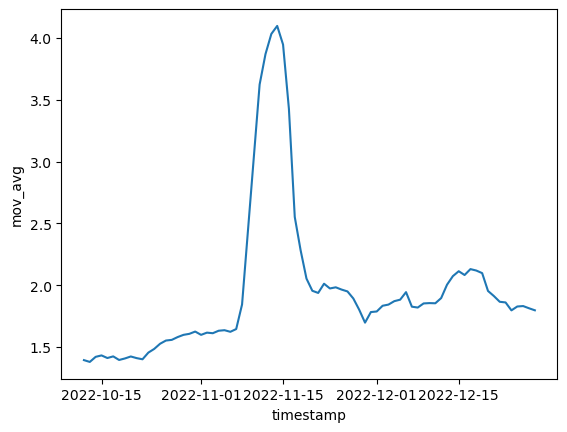

In [901]:
sns.lineplot(x = "timestamp", y = "mov_avg",
             data = df[df.total_portfolio_yield <5])
# sns.lineplot(x = "timestamp", y = "apy | USDC (compound)",
#              data = df)
# sns.lineplot(x = "timestamp", y = "apy | USDC (compound)",
#              data = df)

<AxesSubplot:xlabel='timestamp', ylabel='mov_avg'>

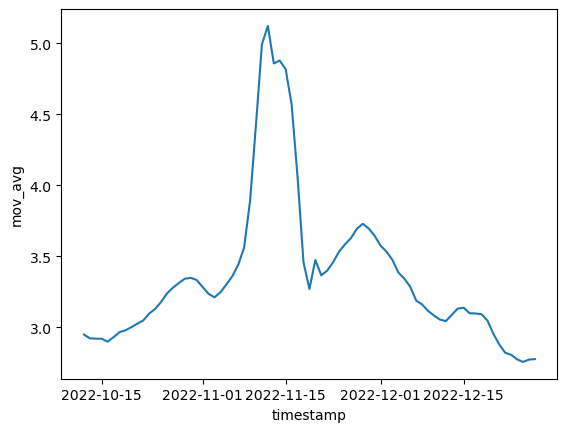

In [791]:
sns.lineplot(x = "timestamp", y = "mov_avg",
             data = df)

In [1019]:
df_1 = df.drop(['ohm_mov_avg', 'compound_mov_avg'], axis=1)

In [ ]:
# clean up visualizations

# try to create functions? 

In [1022]:
df_1.to_csv('olympus_basket_wo_ohm_pools.csv')

In [1037]:
df_2 = df

In [1039]:
df_2.to_csv('olympus_basket_with_ohm_pools.csv')

In [1072]:
df_3 = df

In [1073]:
df_3.to_csv('Compound_basket.csv')

In [1077]:
t = pd.read_csv('Compound_basket.csv')

In [1092]:
t[apy_cols]

,apy | USDC (compound-v3),apy | FRAX-USDC (convex-finance),apy | FRAX-USDC (curve),apy | USDC-USDT (uniswap-v3),apy | USDC (compound),apy | DAI (compound),apy | MIM-3CRV (convex-finance),apy | USDT (aave-v2),apy | USDT (compound)
0,1.96,2.48,1.43,2.56,1.26,1.76,8.87,1.25,1.49
1,1.94,2.45,1.46,1.48,1.27,1.78,8.90,1.26,1.50
2,1.96,2.41,1.34,1.75,1.27,1.78,8.56,1.31,1.49
3,1.90,2.37,1.35,1.06,1.29,1.79,9.57,1.22,1.49
4,2.15,2.32,1.29,1.95,1.28,1.85,9.35,1.19,1.48
...,...,...,...,...,...,...,...,...,...
81,1.55,1.87,1.01,3.61,1.55,1.67,8.73,2.22,1.98
82,1.55,1.86,1.03,2.04,1.57,1.68,8.51,2.27,1.92
83,1.56,1.79,1.00,3.02,1.54,1.69,8.04,2.23,1.98
84,1.56,1.84,0.94,3.58,1.54,1.70,8.65,2.25,1.79


In [1085]:
x = pd.read_csv('olympus_basket_wo_ohm_pools.csv')

In [1088]:
x[[col for col in x.columns if 'tvlUsd |' in col]]

,tvlUsd | FRAX-USDC (convex-finance),tvlUsd | USDC-USDT (uniswap-v3),tvlUsd | USDC (compound),tvlUsd | DAI (compound),tvlUsd | USDT (aave-v2),tvlUsd | ALUSD-3CRV (convex-finance)
0,468964646,135264712.00,1054201274,807065086,213056744,90435768
1,501848968,138077465.00,1059427477,806709799,209167984,90524691
2,505533915,137708362.00,1061058871,830744612,212501219,90542654
3,516768403,137738089.00,1052077916,825509052,212613066,94618217
4,518273918,138362723.00,1043319488,823220778,227295389,94645855
...,...,...,...,...,...,...
149,406578810,118477841.00,344047097,261497628,105470672,60585345
150,406606746,119120104.00,341868559,262537981,105920216,60529067
151,409991866,120832823.00,338781957,261669182,103500661,60536232
152,407708164,119737626.00,337375991,257706955,106929395,60480809


In [1090]:
x[[col for col in x.columns if 'income_basket_weight |' in col]]

,income_basket_weight | FRAX-USDC (convex-finance),income_basket_weight | USDC-USDT (uniswap-v3),income_basket_weight | USDC (compound),income_basket_weight | DAI (compound),income_basket_weight | USDT (aave-v2),income_basket_weight | ALUSD-3CRV (convex-finance)
0,0.29,0.16,0.20,0.17,0.09,0.09
1,0.29,0.16,0.20,0.17,0.09,0.09
2,0.29,0.16,0.20,0.17,0.09,0.09
3,0.29,0.16,0.20,0.17,0.09,0.09
4,0.29,0.16,0.20,0.17,0.09,0.09
...,...,...,...,...,...,...
149,0.29,0.16,0.20,0.17,0.09,0.09
150,0.29,0.16,0.20,0.17,0.09,0.09
151,0.29,0.16,0.20,0.17,0.09,0.09
152,0.29,0.16,0.20,0.17,0.09,0.09


In [1091]:
x[[col for col in x.columns if 'apy |' in col]]

,apy | FRAX-USDC (convex-finance),apy | USDC-USDT (uniswap-v3),apy | USDC (compound),apy | DAI (compound),apy | USDT (aave-v2),apy | ALUSD-3CRV (convex-finance)
0,7.90,2.87,1.12,1.21,1.77,7.89
1,7.35,2.85,1.12,1.22,1.78,7.63
2,7.38,1.75,1.12,1.21,1.79,7.34
3,7.39,2.87,1.15,1.23,1.81,6.91
4,7.86,3.07,1.17,1.21,1.75,7.28
...,...,...,...,...,...,...
149,1.84,2.83,1.52,1.66,2.22,3.58
150,1.87,3.61,1.55,1.67,2.22,3.71
151,1.86,2.04,1.57,1.68,2.27,3.66
152,1.79,3.02,1.54,1.69,2.23,3.48
